In [11]:
%pip install -U langgraph langchain langchain_openai langchain_experimental langsmith pandas tavily-python langgraph-cli

  Obtaining dependency information for langgraph-cli from https://files.pythonhosted.org/packages/19/e4/fac960db5b6cb1690018021a0ea77aa42b654048787a625c553b8f6b8e01/langgraph_cli-0.1.54-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from graph import graph
from langchain_core.messages import HumanMessage
from IPython.display import Image, Markdown, display

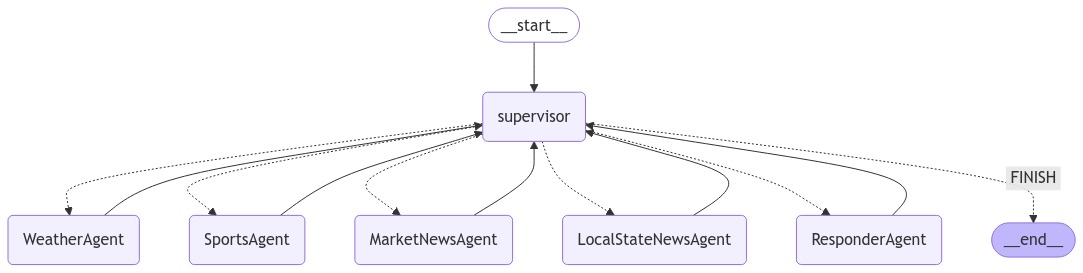

In [7]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
INSTR = "Is it going to be cold where the Broncos play next?"

messages = []

for s in graph.stream(
    {
        "messages": [
            HumanMessage(content=INSTR)
        ]
    },
    subgraphs=True,
    config={"recursion_limit": 100}
):
    messages.append(s)
    if "__end__" not in s:
        print(s)
        print("----")

((), {'supervisor': {'next': 'SportsAgent', 'query': 'Find out the location and date of the next game for the Denver Broncos.', 'reason': 'To determine the weather conditions, we first need to know where and when the Denver Broncos are playing next.'}})
----
(('SportsAgent:9c31d129-808f-2b32-e22b-ecff91e857e5',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_PV1Rh3ijqhnoFLUGs1FKhLPq', 'function': {'arguments': '{"query":"Denver Broncos next game location and date 2024"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 157, 'total_tokens': 184, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_45cf54deae', 'finish_reason

In [9]:
display(Markdown(messages[-2][1]['ResponderAgent']['messages'][0].content))

The Denver Broncos will play their next game against the Las Vegas Raiders on November 24, 2024, in Las Vegas. The weather forecast for that day in Las Vegas indicates cooler than normal temperatures, with highs ranging from 56 to 66 °F (13 to 19 °C) and lows from 35 to 45 °F (1 to 7 °C). There is also a 55% chance of rain or snow [source](https://www.weathertab.com/en/long-range-weather/e/11/24/united-states/nevada/las-vegas/).

In [10]:
INSTR = "I live in Eden Prairie, Minnesota - I'd like my morning brief"

messages = []

for s in graph.stream(
    {
        "messages": [
            HumanMessage(content=INSTR)
        ]
    },
    subgraphs=True,
    config={"recursion_limit": 100}
):
    messages.append(s)
    if "__end__" not in s:
        print(s)
        print("----")

((), {'supervisor': {'next': 'WeatherAgent', 'query': 'Eden Prairie, Minnesota', 'reason': 'The user requested a morning brief, which typically includes the current weather. Starting with the WeatherAgent will provide the user with the latest weather information for Eden Prairie, Minnesota.'}})
----
(('WeatherAgent:421d9123-3b1d-bb75-666e-5d7f33dcf7f2',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_f7LXIRAzh1pehua7WZrnCLnr', 'function': {'arguments': '{"query":"Eden Prairie Minnesota weather November 18 2024"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 147, 'total_tokens': 175, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fi

In [12]:
display(Markdown(messages[-2][1]['WeatherAgent']['messages'][0].content))

The weather in Eden Prairie, Minnesota, on November 18, 2024, is sunny with a temperature of 3.3°C (37.9°F). The wind is blowing from the south-southeast at 7.2 mph (11.5 kph), and the humidity is at 82%. There is no precipitation, and the visibility is 16 km (9 miles). The UV index is low at 0.4, and the wind chill makes it feel like 0.3°C (32.5°F) [source](https://www.weatherapi.com/).

In [22]:
display(Markdown(messages[-7][1]['ResponderAgent']['messages'][0].content))

Here is your morning brief for Eden Prairie, Minnesota, on November 18, 2024:

### Weather
The weather today is expected to be sunny with a temperature of approximately 3.3°C (37.9°F). Winds will be coming from the south-southeast at about 7.2 mph (11.5 kph), and the humidity is around 82%. There is no precipitation expected, and visibility is good at 16 km (9 miles) [source](https://www.weatherapi.com/).

### Sports
- **Minnesota Timberwolves**: Julius Randle hit a buzzer-beating 3-pointer to secure a 120-117 victory over the Phoenix Suns, scoring 35 points [CBS News](https://www.cbsnews.com/minnesota/news/mn-timberwolves-suns-game-nov-17-2024/).
- **Minnesota Vikings**: The Vikings won 23-13 against the Tennessee Titans, with linebacker Andrew Van Ginkel making a notable impact [Twin Cities](https://www.twincities.com/2024/11/17/five-takeaways-from-vikings-23-13-win-over-titans/).

### Market News
The stock market experienced a decline, with the Dow Jones Industrial Average falling by 1.2%, the S&P 500 by 2.1%, and the Nasdaq Composite by 3.2%. This was influenced by a hawkish statement from the Federal Reserve Chairman and concerns about economic policies under former President Trump. Vaccine manufacturers' stocks also saw a decline [Yahoo Finance](https://finance.yahoo.com/news/stock-market-news-nov-18-080700493.html) [Nasdaq](https://www.nasdaq.com/articles/stock-market-news-nov-18-2024).

### Local News
- **Tragic Incident**: An 11-year-old boy with autism was found deceased in an Eden Prairie pond after being reported missing [CBS News Minnesota](https://www.cbsnews.com/minnesota/tag/eden-prairie/) [Patch](https://patch.com/minnesota/edenprairie).
- **Sustainability Awards**: Eden Prairie honored four recipients with the Sustainable Eden Prairie Award for their efforts in landscape, water, energy, and waste conservation [Eden Prairie Local News](https://www.eplocalnews.org/category/city-of-eden-prairie/).

These updates should keep you informed about the key happenings in your area today.